In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r'G:\internship\train.csv')
test_data=pd.read_csv(r'G:\internship\test (1).csv')

In [3]:
train_data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
test_data

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [5]:
train_data.shape

(913000, 4)

In [6]:
test_data.shape

(45000, 4)

In [7]:
train_data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [8]:
test_data.nunique()

id       45000
date        90
store       10
item        50
dtype: int64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [11]:
test_data.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [12]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [13]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [14]:
test_data.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

# EDA

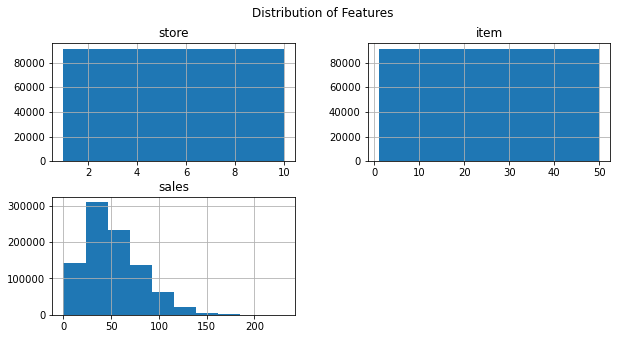

In [15]:
train_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()

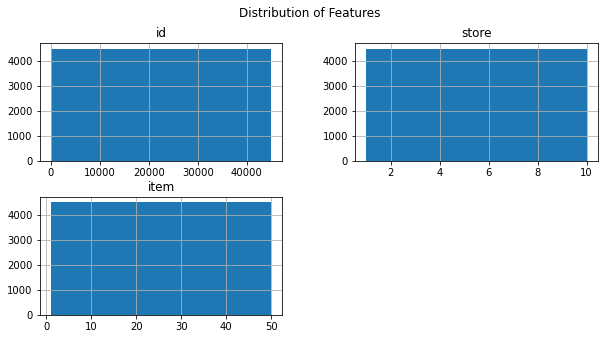

In [16]:
test_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()


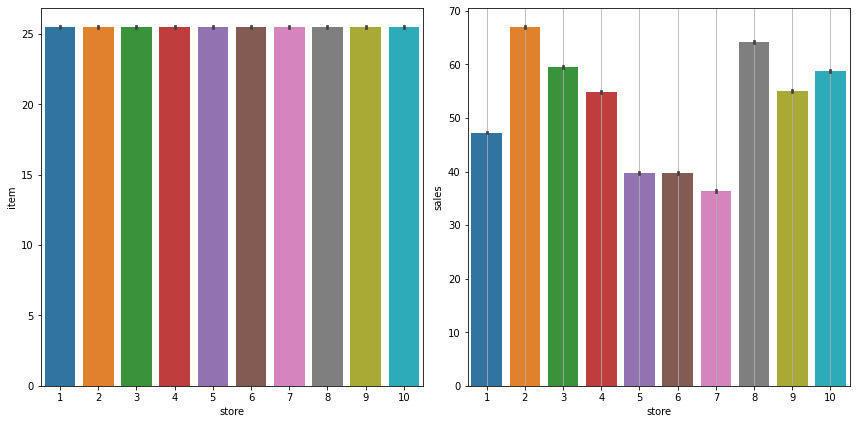

In [17]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=train_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

In [18]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [19]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [20]:
test_data.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# OUTliers

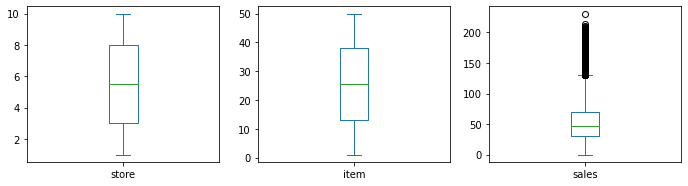

In [23]:
train_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

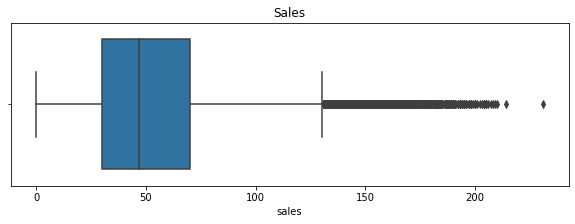

In [24]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()


In [25]:
q1=np.percentile(train_data['sales'],25,interpolation='midpoint')
q2=np.percentile(train_data['sales'],50,interpolation='midpoint')
q3=np.percentile(train_data['sales'],75,interpolation='midpoint')
iqr=q3-q1
up_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print('\033[1;4m','Sales','\033[0m')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('IQR:',iqr)
print('lower limit:',low_lim)
print('upper limit:',up_lim)
outlier=[]
for x in train_data['sales']:
    if ((x<low_lim) or (x>up_lim)):
        outlier.append(x)
    
train_data['sales']=np.where(train_data['sales']<low_lim,low_lim,np.where(train_data['sales']>up_lim,up_lim,train_data['sales']))
    
        

 Sales 
Q1: 30.0
Q2: 47.0
Q3: 70.0
IQR: 40.0
lower limit: -30.0
upper limit: 130.0


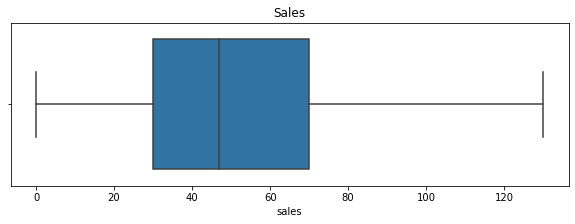

In [26]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  int64  
 2   item    913000 non-null  int64  
 3   sales   913000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ MB


In [28]:
# feature reduction

In [29]:
train_data=train_data.drop(['item','store'],axis=1)

In [30]:
# to time series

In [31]:
train_data['date']=pd.to_datetime(train_data['date'])

In [32]:
train_data.set_index('date',inplace=True)

In [33]:
train_data

,sales
date,
2013-01-01,13.0
2013-01-02,11.0
2013-01-03,14.0
2013-01-04,13.0
2013-01-05,10.0
...,...
2017-12-27,63.0
2017-12-28,59.0
2017-12-29,74.0


Text(0, 0.5, 'sales')

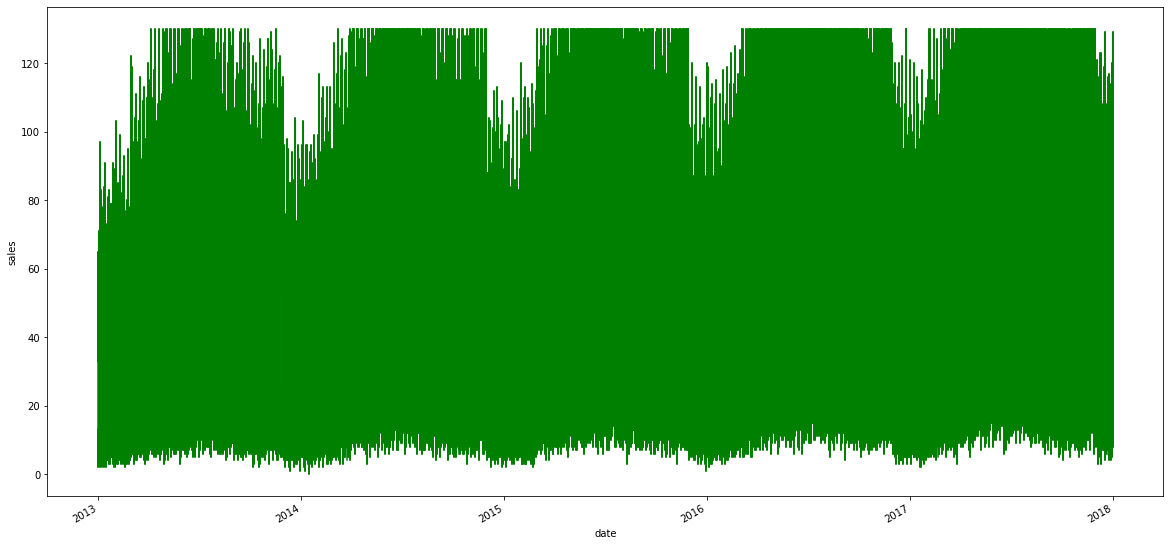

In [34]:
train_data['sales'].resample('D').plot(figsize=(20,10),c='green')
plt.ylabel('sales')

<AxesSubplot:xlabel='date'>

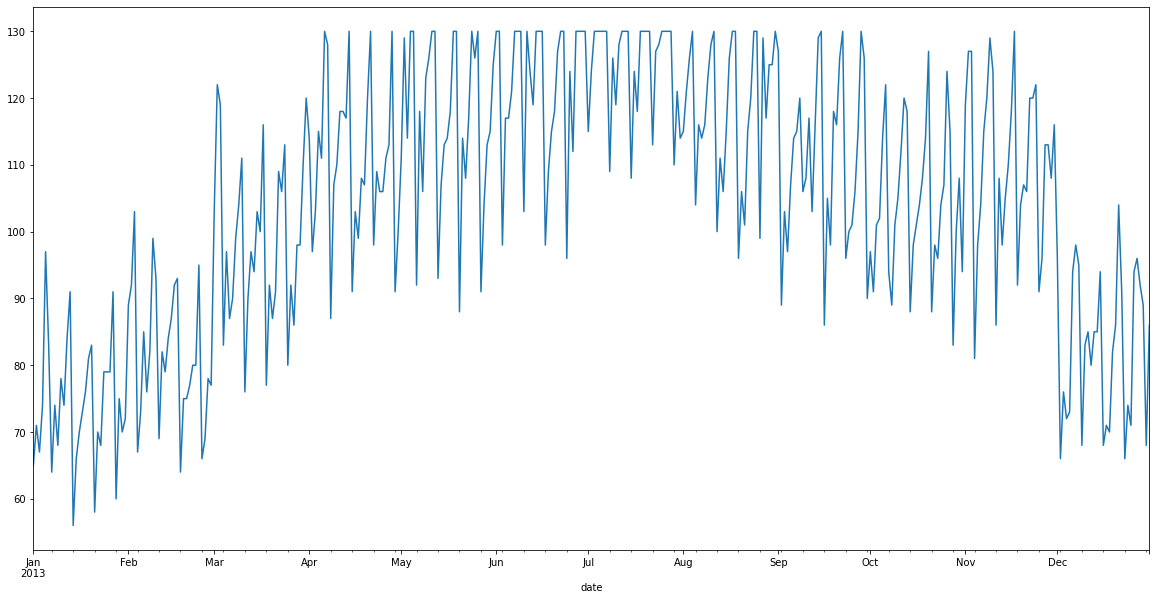

In [35]:
train_data['sales'].resample('D').max().loc['2013-01-01':'2013-12-31'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

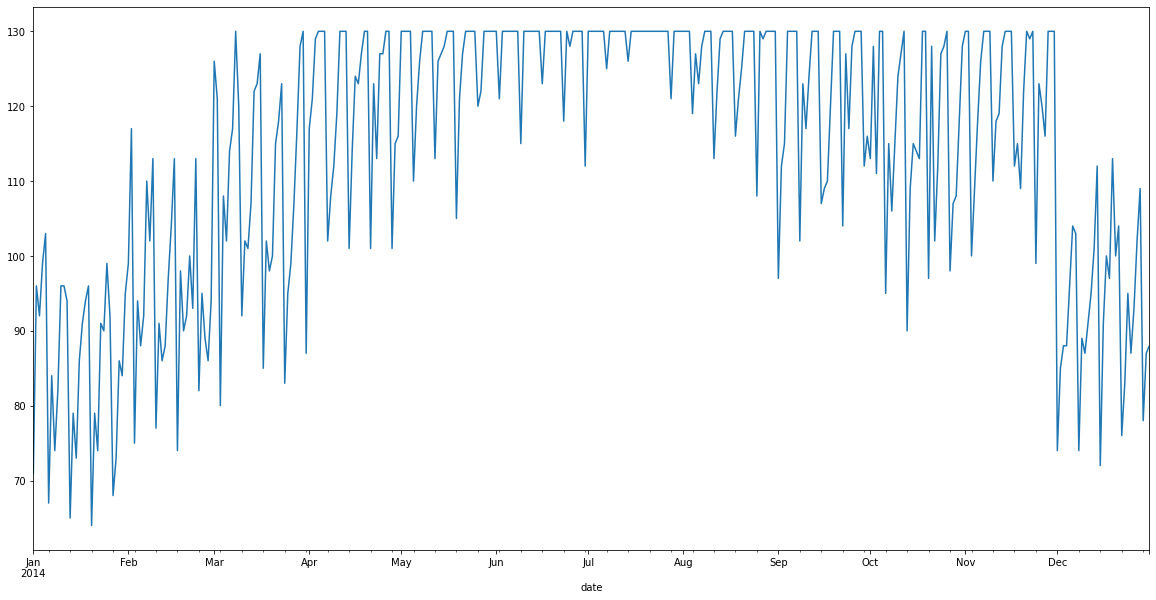

In [36]:
train_data['sales'].resample('D').max().loc['2014-01-01':'2014-12-31'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

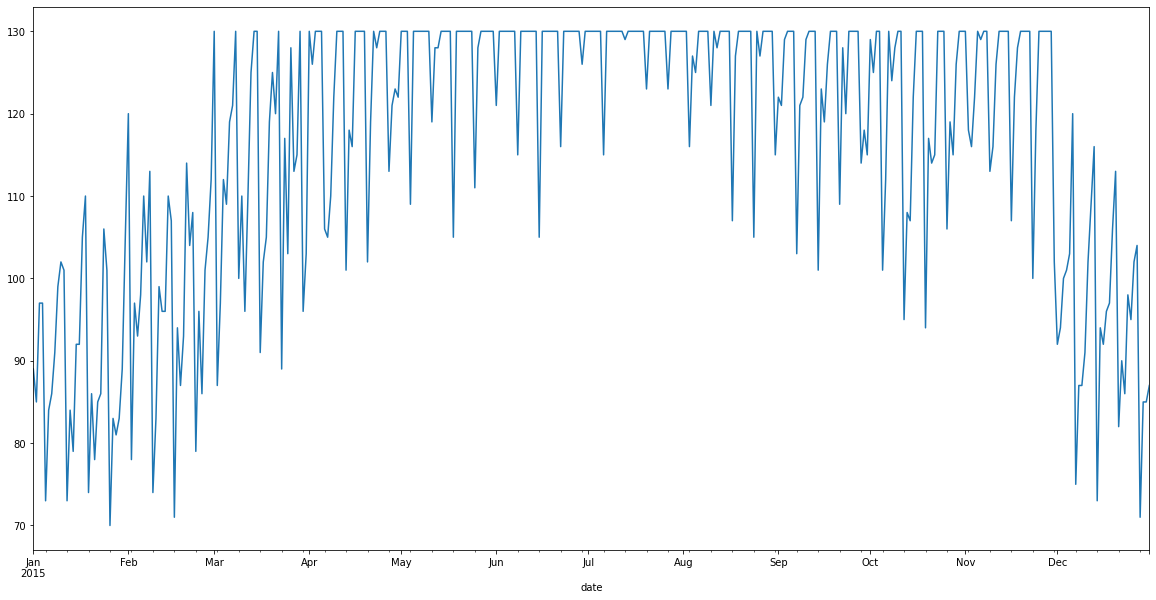

In [37]:
train_data['sales'].resample('D').max().loc['2015-01-01':'2015-12-31'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

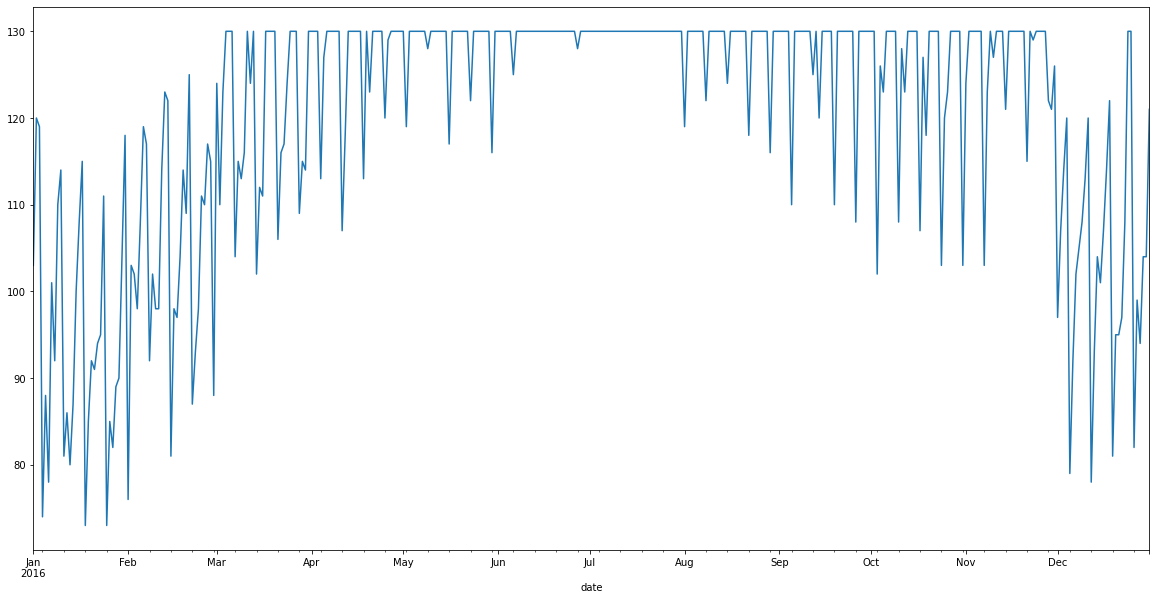

In [38]:
train_data['sales'].resample('D').max().loc['2016-01-01':'2016-12-31'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

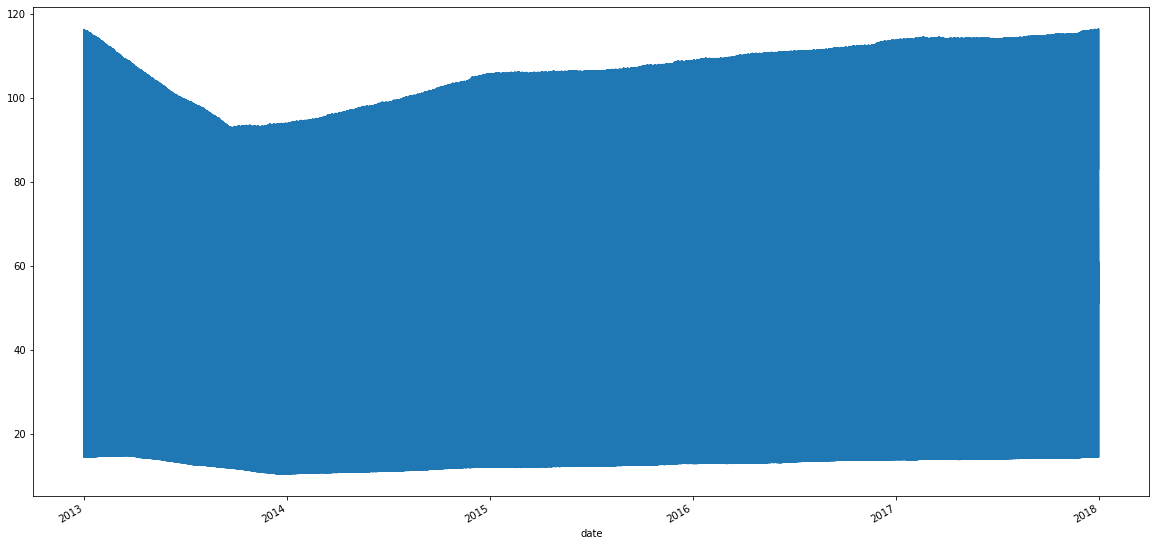

In [39]:
train_data['mov_avg'] =train_data['sales'].rolling(window=360).mean()
train_data['mov_avg'].dropna().plot(figsize=(20,10))

In [40]:
# Modeling

In [41]:
data1=train_data

In [42]:
series=data1['sales'].squeeze()
type(series)

pandas.core.series.Series

In [43]:
values=pd.DataFrame(series)

In [44]:
base_model=pd.concat([values,values.shift(1)],axis=1)

In [45]:
base_model.head()

,sales,sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [46]:
base_model.columns=['Actual_sales','Forecasted_sales']

In [47]:
base_model.head()


,Actual_sales,Forecasted_sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [48]:
base_model.dropna()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0
...,...,...
2017-12-27,63.0,41.0
2017-12-28,59.0,63.0
2017-12-29,74.0,59.0


In [49]:
base_test=base_model[1:]
base_test.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0


In [50]:
from sklearn.metrics import mean_squared_error


In [51]:
base_error=mean_squared_error(base_test.Actual_sales,base_test.Forecasted_sales)
base_error

189.05599568017053

In [52]:
np.sqrt(base_error)

13.749763477244636

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

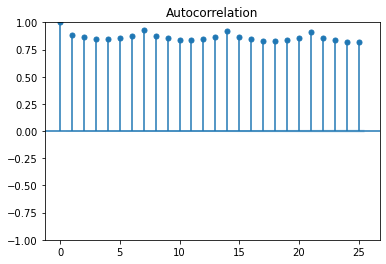

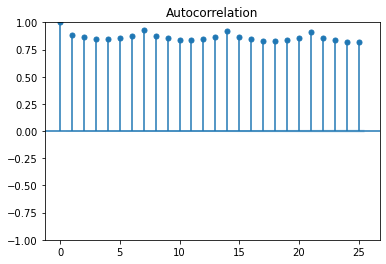

In [54]:
plot_acf(series,lags=25)

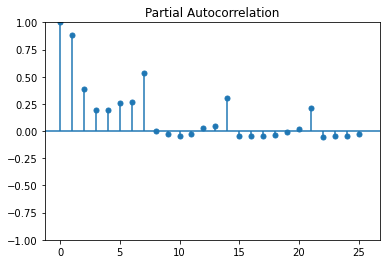

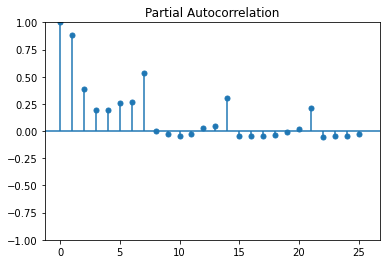

In [55]:
plot_pacf(series,lags=25)

In [56]:
train_data.columns

Index(['sales', 'mov_avg'], dtype='object')

In [57]:
train_data=train_data.drop(['mov_avg'],axis=1)

In [58]:
test=series[0:225000]
train=series[225000:912999]

In [59]:
test.size

225000

In [60]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [61]:
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:               687999
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -2776663.876
Date:                Fri, 23 Sep 2022   AIC                        5553329.752
Time:                        23:17:14   BIC                        5553341.193
Sample:                             0   HQIC                       5553332.949
                             - 687999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       187.5119      0.232    809.687      0.000     187.058     187.966
===================================================================================
Ljung-Box (L1) (Q):              121466.97   Jarque-Bera (JB):            152239.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels')
print(pred)

687999    62.0
688000    62.0
688001    62.0
688002    62.0
688003    62.0
          ... 
912994    62.0
912995    62.0
912996    62.0
912997    62.0
912998    62.0
Name: predicted_mean, Length: 225000, dtype: float64


<AxesSubplot:xlabel='date'>

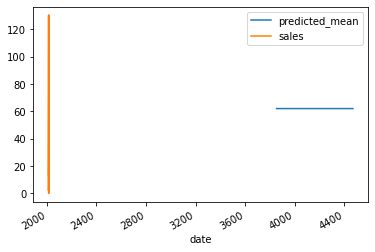

In [63]:
pred.plot(legend=True)
test.plot(legend=True)

In [64]:
test.mean()

52.24135111111111

In [65]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

29.906060924167196


In [66]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [67]:
boston=load_boston()
x,y=boston.data,boston.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [68]:
xgbr=XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [69]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print('Training score:',score)


Training score: 0.9999953742060352


In [70]:
cv_score=cross_val_score(xgbr,xtrain,ytrain,cv=5)
print('CV mean score:',cv_score.mean())

CV mean score: 0.8696107878161999


In [71]:
ypred=xgbr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
print('MSE:',mse)
print('RMSE:',mse*(1/2))

MSE: 10.296631851469476
RMSE: 5.148315925734738


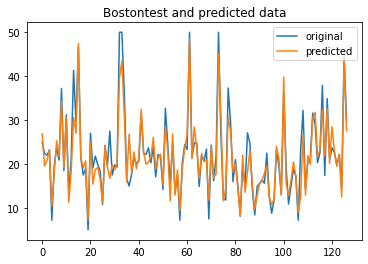

In [72]:
x_ax=range(len(ytest))
plt.plot(x_ax,ytest,label='original')
plt.plot(x_ax,ypred,label='predicted')
plt.title('Bostontest and predicted data')
plt.legend()
plt.show()

In [76]:
train_data

,sales
date,
2013-01-01,13.0
2013-01-02,11.0
2013-01-03,14.0
2013-01-04,13.0
2013-01-05,10.0
...,...
2017-12-27,63.0
2017-12-28,59.0
2017-12-29,74.0


In [81]:
from sklearn import linear_model
lr=linear_model.LinearRegression() 

In [82]:
model=lr.fit(xtrain,ytrain)
predictions=model.predict(x_test)

In [86]:
print(predictions)

[28.9761571  35.69847771 13.91680107 24.08539206 18.52557495 23.15220166
 17.55249142 12.99962908 23.61308761 20.10632092 25.20494822 19.56210115
 -3.72566011 21.19079595 19.76377893 25.17682411 21.23255567  6.59526746
 40.26373673 17.58718868 26.51879553 29.94303305 11.32452095 22.86726032
 18.43413916 17.1891603  22.3342705  15.58804002 22.61204643 18.78198115
 23.14593953 24.55617458 24.89741976 19.0956487  17.24032087 17.710552
 30.29655385 19.87857618 23.22896497 23.3372319  13.55875896 32.43611433
 42.66101969 17.37334085 26.61980735 17.56755813 14.35747991 24.43480294
 20.41371691 29.82549104 22.31546081 34.02355284 15.51745873 24.97718434
 38.60722705 22.23084436 18.81074114 33.22450216 24.27662853 14.0172227
 22.42883449 31.06309046 30.41064369 15.76071142 21.03848078 17.4142346
 20.22313421 25.70899131 31.0395003  13.31207334 19.95355058 27.44491185
 11.58456678 17.08789305 23.16789011  6.34778533 21.2296085  41.58184309
 18.14233825  8.43987174 20.73242217 13.85748641 22.181

In [84]:
print("MSE",mean_squared_error(y_test,predictions))

MSE 20.755462999675697


In [85]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,predictions)
r_sq

0.7169726951860655